In [1]:
# !pip install opencv-python

In [2]:
pip show opencv-python

Name: opencv-python
Version: 4.8.0.74
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /home/sennin/.local/lib/python3.10/site-packages
Requires: numpy, numpy, numpy, numpy
Required-by: openvino-dev
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
## Read image

# img = cv2.imread("/home/sennin/Pictures/Webcam/2022-11-08-204502.jpg", 1) ## Flag = How to read the image
img = cv2.imread("/home/sennin/Downloads/wallpaper/98696.jpg", 1) ## Flag = How to read the image

### Properties of Image
####  Shape
####  Type
####  Image Pixel values
####  Image Resolution

In [5]:
## Shape
## shape give 3 values height, width, number of channel
img.shape

(1000, 1600, 3)

In [6]:
h,w,c = img.shape

In [7]:
h

1000

In [8]:
## Type
## helps to know how the image data is represented
type(img)

numpy.ndarray

In [9]:
## Pixels Value
print(img)

[[[ 33  60 110]
  [ 32  59 109]
  [ 32  59 109]
  ...
  [ 31  61 108]
  [ 31  61 108]
  [ 34  64 111]]

 [[ 28  55 105]
  [ 31  58 108]
  [ 33  60 110]
  ...
  [ 33  63 110]
  [ 32  62 109]
  [ 31  61 108]]

 [[ 29  56 106]
  [ 33  60 110]
  [ 34  61 111]
  ...
  [ 37  67 114]
  [ 36  66 113]
  [ 31  61 108]]

 ...

 [[ 15  16  26]
  [ 15  16  26]
  [ 15  16  26]
  ...
  [ 14  20  33]
  [ 14  20  33]
  [ 14  20  33]]

 [[ 15  16  26]
  [ 15  16  26]
  [ 15  16  26]
  ...
  [ 14  20  33]
  [ 14  20  33]
  [ 14  20  33]]

 [[ 15  16  26]
  [ 15  16  26]
  [ 15  16  26]
  ...
  [ 14  20  33]
  [ 14  20  33]
  [ 14  20  33]]]


In [10]:
## Image Resolution
## Defined as the number of pixels in an image. The quality of the
## image increases when he number of pixels increses 
h,w, _= img.shape

In [11]:
print("Total number of pixels present in an image is" , h*w)

Total number of pixels present in an image is 1600000


### Viewing the image

In [12]:
cv2.imshow('Hum', img)
k = cv2.waitKey(0) 
## waitKey(0) 0 --> to keep the window open until we close it. Also give milisecond instead of 0
## ascii of esc == 27
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()

### Saving the image

In [13]:
# Converting image to grayscale then save it
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [14]:
cv2.imshow('Hum', gray_image)
k = cv2.waitKey(0) 
## waitKey(0) 0 --> to keep the window open until we close it. Also give milisecond instead of 0
## ascii of esc == 27
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()

In [15]:
## to save the image
cv2.imwrite("Gray_image.jpg",gray_image)

True

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def extract_bit_plane(cd):
    # extracting all bit one by one
    # from 1st to 8th in a variable
    # from c1 to c8 respectively
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    
    ## combining image again to form equivalent to original grayscale image
    
    cc = 2 *(2* (2* c8 + c7) + c6) ## reconstructing image with 3 most significant bit planes
    to_plot = [cd,c1,c2,c3,c4,c5,c6,c7,c8,cc]
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
    fig.subplots_adjust(hspace = 0.05, wspace = 0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap = 'gray')
    plt.tight_layout()
    plt.show()
    
    return cc

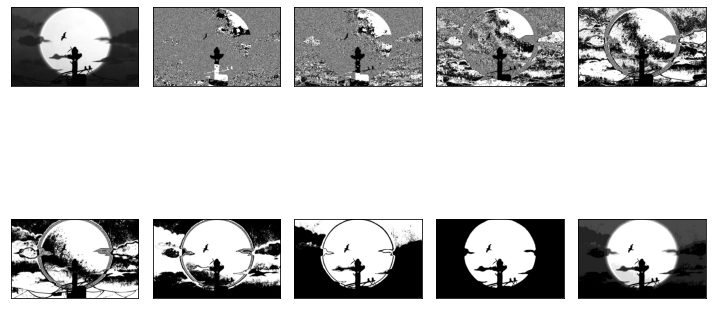

In [18]:
reconstructed_image = extract_bit_plane(gray_image)

### Changing color spaces BGR to RGB

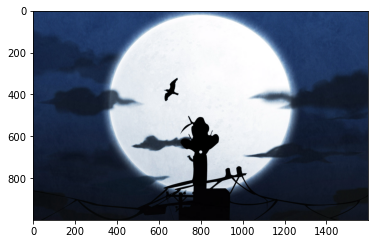

In [19]:
plt.imshow(img)

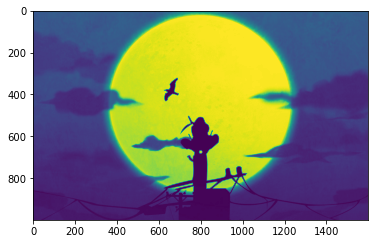

In [20]:
plt.imshow(gray_image)

In [21]:
## converting image to HSV format
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

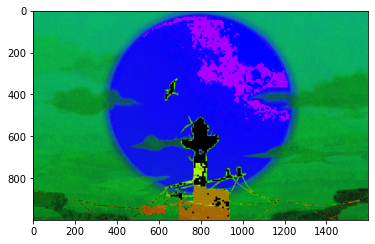

In [22]:
plt.imshow(hsv_image)

### Resizing images

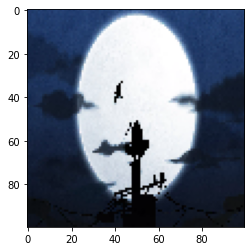

In [23]:
## Scaled up and sclaed down the image
smaller_image = cv2.resize(img, (100,100),interpolation = cv2.INTER_NEAREST)
plt.imshow(smaller_image)

### Image Rotation

In [24]:
h, w, _ = img.shape

In [25]:
mid = cv2.getRotationMatrix2D((w/2,h/2),180,1)

In [26]:
dst = cv2.warpAffine(img, mid,(w,h))

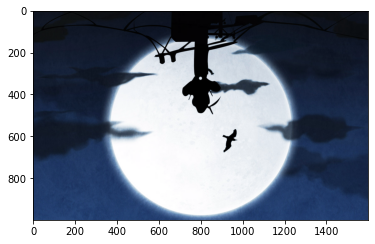

In [27]:
plt.imshow(dst)

### Image Translation

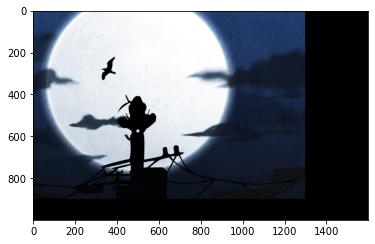

In [35]:
# Image translation is a geometric transformation 
# that maps the position of evry objevt inthe image to as new locaion n the final output image

# shifting the image 100 pixels in both dimensions

M = np.float32([[1,0,-300],[0,1,-100]])
dst = cv2.warpAffine(img, M,(w,h))
plt.imshow(dst)

### Image Thresholding

In [36]:
# Thresholding is an image segmantation method. 
# It compares pixel value with threshold value and updates it accordingly.
# if image(x,y) > threshold ==>(image(x,y)=1)
# otherwise, image(x,y)= 0
# Thresholding can only apply on grascale image

In [38]:
gray_image = cv2.imread("/home/sennin/Downloads/wallpaper/98696.jpg", 0) # 0 == gray_scale image

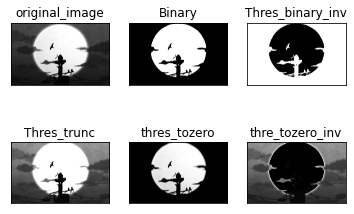

In [43]:
ret, thresh_binary = cv2.threshold(gray_image, 127,255,cv2.THRESH_BINARY)
ret, thresh_binary_inv = cv2.threshold(gray_image, 127,255,cv2.THRESH_BINARY_INV)
ret, thresh_trunc = cv2.threshold(gray_image, 127,255,cv2.THRESH_TRUNC)
ret, thresh_tozero = cv2.threshold(gray_image, 127,255,cv2.THRESH_TOZERO)
ret, thresh_tozero_inv = cv2.threshold(gray_image, 127,255,cv2.THRESH_TOZERO_INV)


## displaying different different threshold value
names = ['original_image','Binary','Thres_binary_inv','Thres_trunc','thres_tozero','thre_tozero_inv']
images = [gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

### Image segmentation

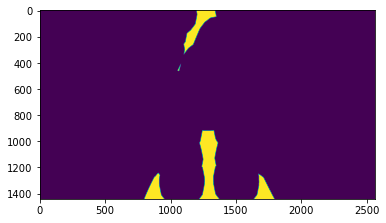

In [48]:
## Image segmentation is the task of classifying every pixel in the image to some class.
# For example, classifying every pixels as foreground or backgrounf.
# Image segmentaion is importtant for extracting the relevent parts from an image.

# Watershed Algorithm is classical image segmentation algorithm
#reading the image
image = cv2.imread('/home/sennin/Downloads/wallpaper/945804.png')
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)

### Bitwise operator

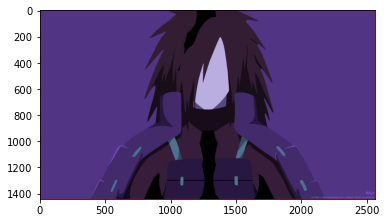

In [51]:
# Useful when we have a mask image and want to apply that mask over another image to
# extract the region of interest
ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_or(image,image,mask = mask) 
#plot the result
plt.imshow(final)

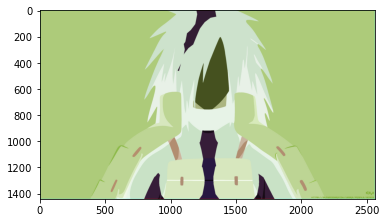

In [54]:
ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_not(image,image,mask = mask) 
#plot the result
plt.imshow(final)

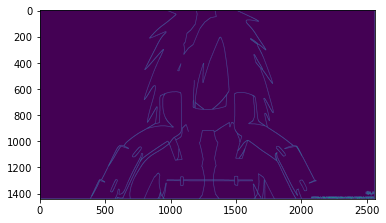

In [55]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)